Saving study_data_mert.xlsx to study_data_mert (2).xlsx

Missing values:
Date                0
StudyDuration       0
PhoneUsage          0
SleepDuration       0
CaffeineIntake      0
StudyEnvironment    0
dtype: int64


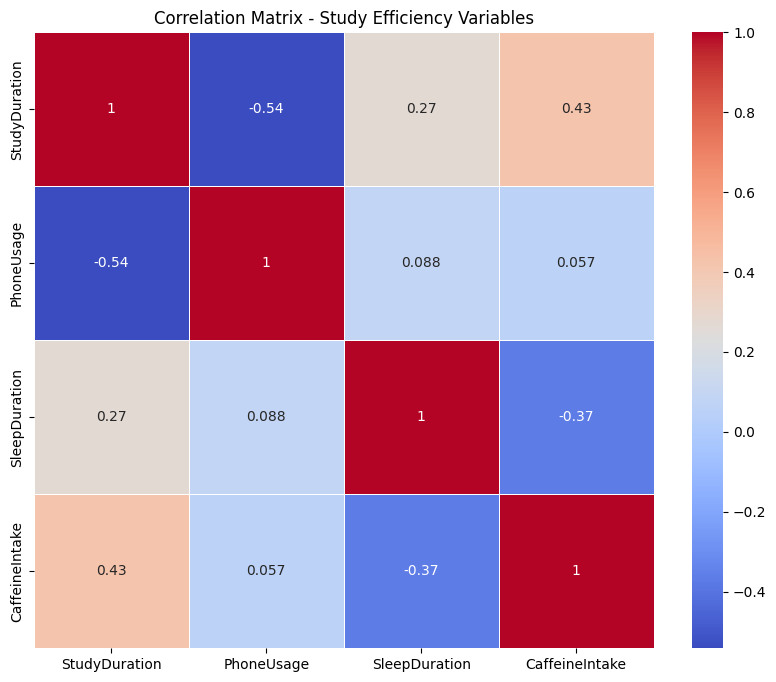

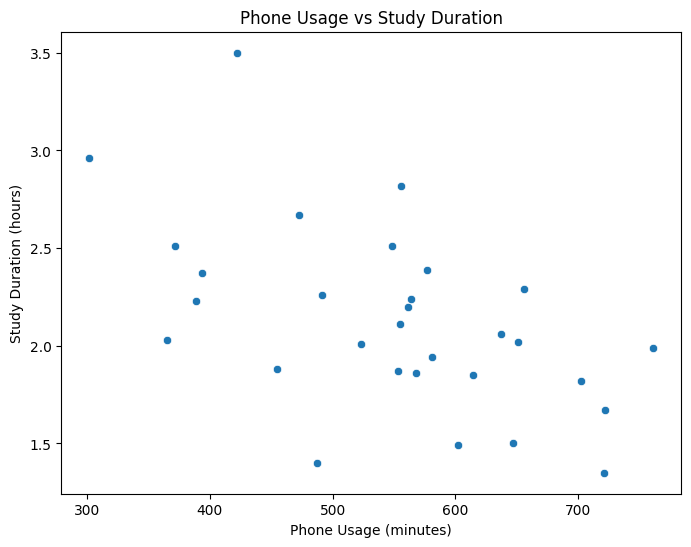

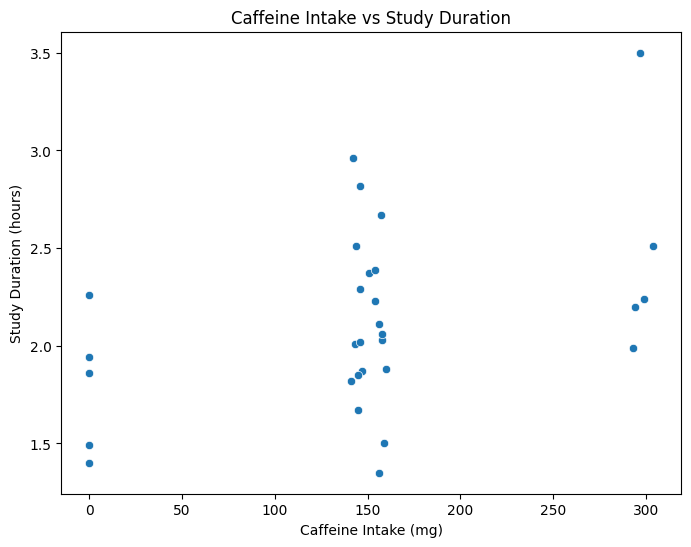

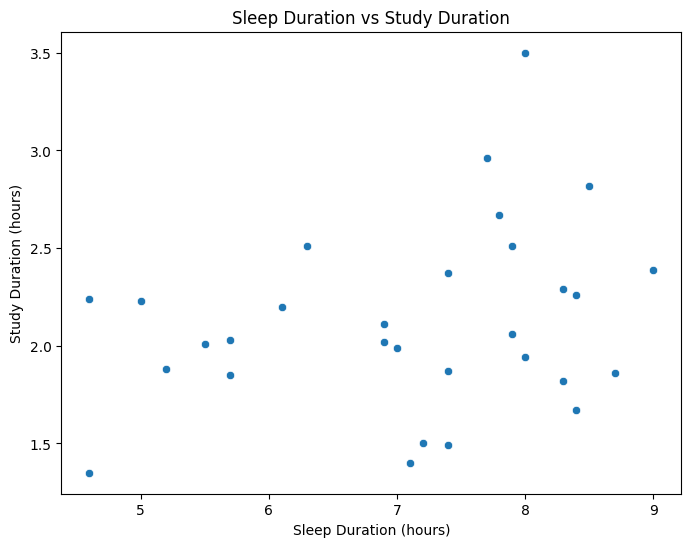

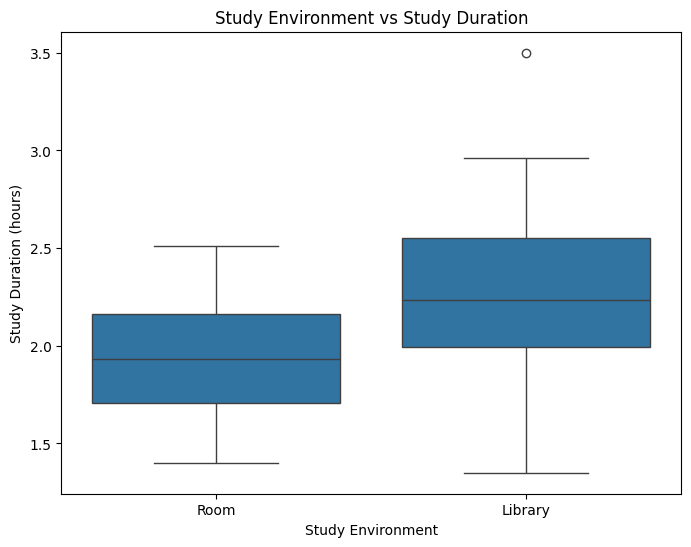

                            OLS Regression Results                            
Dep. Variable:          StudyDuration   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     30.61
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.10e-08
Time:                        21:08:06   Log-Likelihood:                 3.1546
No. Observations:                  30   AIC:                             1.691
Df Residuals:                      26   BIC:                             7.296
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4912      0.346      4.

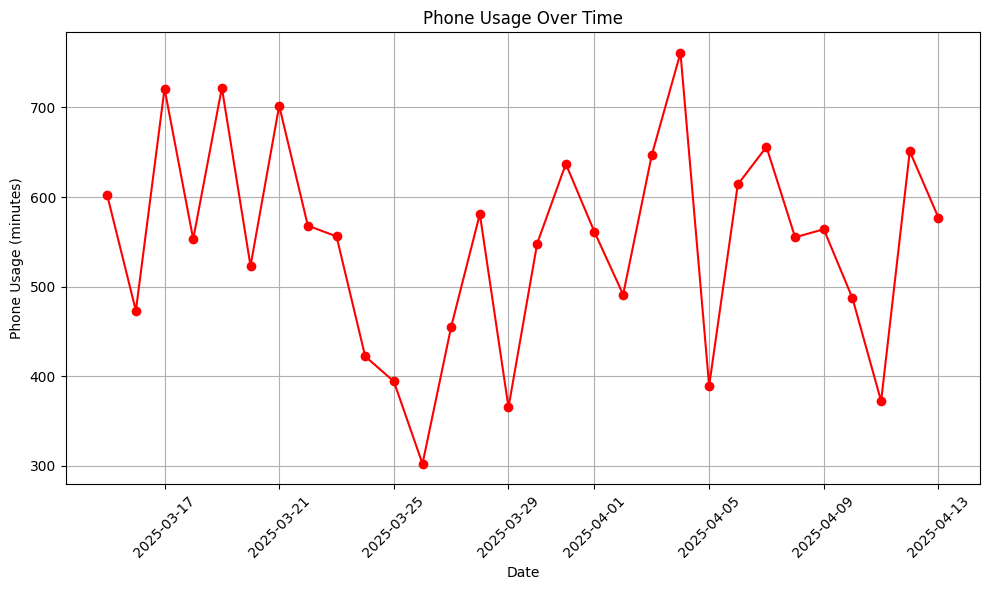

In [ ]:
# Study Efficiency Analysis - Google Colab Notebook

# 1. Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm


from google.colab import files
uploaded = files.upload()

file_path = "study_data_mert.xlsx"


# Load the data
try:
    data = pd.read_excel(file_path)
except Exception as e:
    print("Error loading file:", e)

# 2. Data Cleaning
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Check and fill missing values
print("\nMissing values:")
print(data.isnull().sum())

data.fillna(data.mean(numeric_only=True), inplace=True)

# 3. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Study Efficiency Variables')
plt.show()

# 4. Visualizations

# Phone Usage vs Study Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PhoneUsage', y='StudyDuration', data=data)
plt.title('Phone Usage vs Study Duration')
plt.xlabel('Phone Usage (minutes)')
plt.ylabel('Study Duration (hours)')
plt.show()

# Caffeine Intake vs Study Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CaffeineIntake', y='StudyDuration', data=data)
plt.title('Caffeine Intake vs Study Duration')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Study Duration (hours)')
plt.show()

# Sleep Duration vs Study Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SleepDuration', y='StudyDuration', data=data)
plt.title('Sleep Duration vs Study Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Study Duration (hours)')
plt.show()

# Study Environment vs Study Duration (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='StudyEnvironment', y='StudyDuration', data=data)
plt.title('Study Environment vs Study Duration')
plt.xlabel('Study Environment')
plt.ylabel('Study Duration (hours)')
plt.show()

# 5. Regression Analysis
X = data[['PhoneUsage', 'SleepDuration', 'CaffeineIntake']]
X = sm.add_constant(X)
y = data['StudyDuration']

model = sm.OLS(y, X).fit()
print(model.summary())

# 6. Hypothesis Testing
corr_phone, p_phone = pearsonr(data['PhoneUsage'], data['StudyDuration'])
corr_sleep, p_sleep = pearsonr(data['SleepDuration'], data['StudyDuration'])
corr_caffeine, p_caffeine = pearsonr(data['CaffeineIntake'], data['StudyDuration'])

print("\n\U0001F4F1 Phone Usage vs Study Duration")
print("Correlation:", round(corr_phone, 3), "| P-Value:", round(p_phone, 4))
print("✅ Significant" if p_phone < 0.05 else "❌ Not Significant")

print("\n\U0001F634 Sleep Duration vs Study Duration")
print("Correlation:", round(corr_sleep, 3), "| P-Value:", round(p_sleep, 4))
print("✅ Significant" if p_sleep < 0.05 else "❌ Not Significant")

print("\n\u2615 Caffeine Intake vs Study Duration")
print("Correlation:", round(corr_caffeine, 3), "| P-Value:", round(p_caffeine, 4))
print("✅ Significant" if p_caffeine < 0.05 else "❌ Not Significant")

# 7. Additional Visualization: Weekly Trend of Phone Usage
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['PhoneUsage'], marker='o', color='red')
plt.title('Phone Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Phone Usage (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# End of Notebook 🎯
